# **I. Import all the necessary libraries**

In [19]:
from utils import *
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


# **II. Import and Preprocess the dataset**

In [20]:
data = pd.read_csv('Student_Performance.csv')


In [21]:
train, test = train_test_split(data)


In [22]:
x_test = test[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y_test = test['Performance Index']


In [23]:
x_train = train[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y_train = train['Performance Index']


In [24]:
data


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Columns to normalize: All except for extracurricular activities

In [25]:
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']


In [26]:
x_meta = [x_test,x_train]


In [ ]:
x_meta = [x_test,x_train]
y_meta = [y_test,y_train]
for i in features:
    for j in x_meta:
        if i == 'Extracurricular Activities':
            dict_map = {
                'Yes' : 1,
                'No' : 0,
            }
            j['Extracurricular Activities'] = j['Extracurricular Activities'].map(dict_map)
        else:
            j[i] = z_score_normalize(j[i])
del x_meta,y_meta


In [28]:
x_train


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
7083,0.000,0.254237,0,1.0,0.333333
6589,0.125,0.779661,0,0.4,0.555556
183,1.000,0.627119,1,1.0,0.111111
4913,0.875,0.830508,0,0.4,0.777778
7486,0.000,0.135593,0,0.0,0.000000
...,...,...,...,...,...
1609,0.875,0.322034,0,0.0,1.000000
1627,0.000,0.525424,0,1.0,0.666667
5053,1.000,0.084746,0,0.6,0.444444
4536,1.000,0.983051,0,0.6,0.666667


In [ ]:
y_train


# **III. Train the model**

In [30]:
model = LinearRegression()


In [31]:
model.batch_gradient_descent_train(x_train,y_train,epochs=1000)


Training MSE Loss:  141.42090713011436
Training MSE Loss:  2.1227109666727713
Training MSE Loss:  2.0578505577676647
Training MSE Loss:  2.0562773175713867
Training MSE Loss:  2.0562383757355263
Training MSE Loss:  2.056237411810336
Training MSE Loss:  2.0562373879503464
Training MSE Loss:  2.056237387359742
Training MSE Loss:  2.0562373873451225
Training MSE Loss:  2.0562373873447606
Final training MSE Loss:  2.0562373873447517


In [32]:
print(model.w,model.b)


[[22.76440481]
 [60.13534783]
 [ 0.64265637]
 [ 2.39282062]
 [ 1.74670583]] 11.421823434175495


In [33]:
print(model.predict(x_test.iloc[0].to_numpy()),y_test.iloc[0])


[47.79509443] 50.0


In [34]:
prediction = []
for i in range(x_test.shape[0]):
    prediction.append(model.predict(x_test.iloc[i].to_numpy()))


In [35]:
calculate_mae(prediction,y_test)


1.6376337410179833

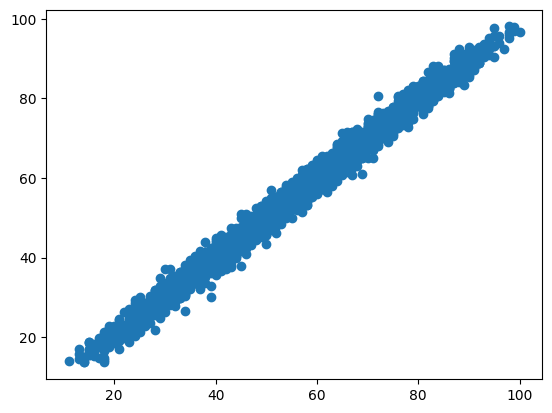

In [36]:
plt.scatter(y_test,prediction)
